In [1]:
pip install pmdarima

     |████████████████████████████████| 610 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 333 kB/s eta 0:00:01
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

In [2]:
url = "/Users/SarthakPratik/Downloads/ARIMA-Temperature_Forecasting-master/MaunaLoaDailyTemps.csv"
df = pd.read_csv(url,index_col='DATE',parse_dates=True)
df = df.dropna()
print('Shape of Dataset',df.shape)
df.head()

Shape of Dataset (1821, 5)


,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


<AxesSubplot:xlabel='DATE'>

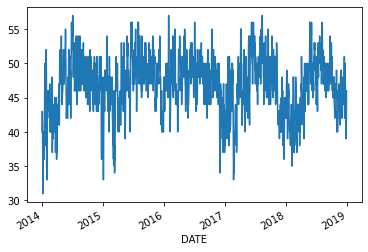

In [3]:
df['AvgTemp'].plot()

In [4]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['AvgTemp'],autolag = 'AIC')

print('1. ADF :',dftest[0])
print('2. P-Value :',dftest[1])
print('3. No. of Lags :',dftest[2])
print('4. Number of Observations used for ADF Regression and Crtitical Value Calculation :',dftest[3])
print('5. Critical Values :',)
for key, val in dftest[4].items():
    print("\t",key,": ",val)

1. ADF : -6.554680125068774
2. P-Value : 8.67593748019975e-09
3. No. of Lags : 12
4. Number of Observations used for ADF Regression and Crtitical Value Calculation : 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


In [5]:
from pmdarima import auto_arima


In [6]:
stepwise_fit = auto_arima(df['AvgTemp'],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8343.609, Time=3.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.33 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=2.28 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=2.58 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.326, Time=3.64 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8317.885, Time=3.96 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.196, Time=3.34 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8310.146, Time=4.29 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8331.976, Time=4.51 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.461, Time=5.16 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8305.100, Time=4.64 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.700
Date:                Thu, 24 Dec 2020   AIC                           8295.400
Time:                        19:51:40   BIC                           8339.457
Sample:                             0   HQIC                          8311.654
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.3054      0.383      3.407      0.001       0.554       2.056
ar.L1          0.9720      0.008    117.881      0.000       0.956       0.988
ma.L1         -0.1321      0.024     -5.545      0.000      -0.179      -0.085
ma.L2         -0.2149      0.024     -8.842      0.000      -0.263      -0.167
ma.L3         -0.1966      0.024     -8.183      0.000      -0.244      -0.150
ma.L4         -0.1348      0.023     -5.903      0.000      -0.180      -0.090
ma.L5         -0.0463      0.024     -1.894      0.058      -0.094       0.002
sigma2         5.5033      0.172     31.913      0.000       5.165       5.841
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                20.79
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
from statsmodels.tsa.arima_model import ARIMA

In [13]:
print(df.shape)
train = df.iloc[:-30]
test = df.iloc[-30:]
print(train.shape,test.shape)

(1821, 5)
(1791, 5) (30, 5)


In [17]:
model = ARIMA(train['AvgTemp'],order=(1,0,5))
model = model.fit()
model.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                     ARMA(1, 5)   Log Likelihood               -4070.198
Method:                       css-mle   S.D. of innovations              2.347
Date:                Thu, 24 Dec 2020   AIC                           8156.395
Time:                        19:53:36   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            46.5856      0.785     59.354      0.000      45.047      48.124
ar.L1.AvgTemp     0.9856      0.007    150.630      0.000       0.973       0.998
ma.L1.AvgTemp    -0.1412      0.025     -5.735      0.000      -0.190      -0.093
ma.L2.AvgTemp    -0.2268      0.024     -9.295      0.000      -0.275      -0.179
ma.L3.AvgTemp    -0.2168      0.026     -8.416      0.000      -0.267      -0.166
ma.L4.AvgTemp    -0.1479      0.023     -6.300      0.000      -0.194      -0.102
ma.L5.AvgTemp    -0.0594      0.025     -2.411      0.016      -0.108      -0.011
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0146           +0.0000j            1.0146            0.0000
MA.1            1.0883           -0.0000j            1.0883           -0.0000
MA.2            0.0555           -1.8423j            1.8431           -0.2452
MA.3            0.0555           +1.8423j            1.8431            0.2452
MA.4           -1.8432           -1.0734j            2.1330           -0.4161
MA.5           -1.8432           +1.0734j            2.1330            0.4161
-----------------------------------------------------------------------------
"""

In [18]:
start = len(train)
end = len(train)+len(test)-1
pred = model.predict(start=start,end=end,typ='levels')
pred.index = df.index[start:end+1]
print(pred)

DATE
2018-12-01    44.754152
2018-12-02    44.987869
2018-12-03    45.388831
2018-12-04    45.721632
2018-12-05    45.863809
2018-12-06    45.874204
2018-12-07    45.884450
2018-12-08    45.894548
2018-12-09    45.904500
2018-12-10    45.914310
2018-12-11    45.923978
2018-12-12    45.933506
2018-12-13    45.942898
2018-12-14    45.952154
2018-12-15    45.961277
2018-12-16    45.970269
2018-12-17    45.979131
2018-12-18    45.987866
2018-12-19    45.996474
2018-12-20    46.004959
2018-12-21    46.013322
2018-12-22    46.021564
2018-12-23    46.029687
2018-12-24    46.037694
2018-12-25    46.045585
2018-12-26    46.053362
2018-12-27    46.061028
2018-12-28    46.068583
2018-12-29    46.076029
2018-12-30    46.083368
dtype: float64


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:xlabel='DATE'>

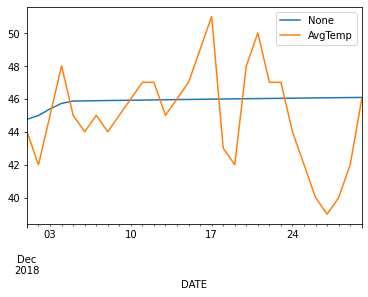

In [19]:
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)